---
# **[1 - Modellierung von GA](https://github.com/Artificial-Intelligence-HSBI-TDU/KI-Vorlesung-W25/blob/master/homework/sheet-ea.md#ea01-modellierung-von-ga-2p)**
---

Betrachten Sie das **8-Queens-Problem** sowie das **Landkarten-Färbeproblem** (aus Vorlesung [CSP: Intro](https://github.com/Artificial-Intelligence-HSBI-TDU/KI-Vorlesung-W25/blob/master/lecture/csp/csp1-intro.md)). Starten Sie beim Färbeproblem mit fünf verschiedenen Farben, Ziel sollte eine konfliktfreie Einfärbung mit einer minimalen Anzahl an Farben sein.

Geben Sie für beide Probleme je eine geeignete **Kodierung** der Individuen, passende Operatoren (**Crossover**, **Mutation**) und eine geeignete **Fitnessfunktion** an, damit die Probleme mit einem **GA** gelöst werden können. Begründen Sie Ihre Wahl!

Was würden Sie noch benötigen, um die obigen Probleme jeweils mit **Simulated Annealing** lösen zu können?

Thema: Modellierung für **GA** und **Gradientensuche**

---
## **1.1 - 8-Queens-Problem**

---
### **1.1.1 - Kodierung**

Für die $n = 8$ Damen wird jeweils die Position in ihrer Spalte - Problemvariable $x_i \in \{0, \dots, 7\}$ - kodiert. Mit der entsprechenden Segementlänge im Bitstring $log_2(8) = 3$ ergibt sich dann als Kodierung ein Bitstring der Länge $m = 8 \cdot log_2(8) = 24$. Die Abbildung ist also ein Basiswechsel von Dezimal zu Dual:

$$
\begin{align}
g: \space & \{ 0, \dots, 7\}^{8} & \to & \space \space \{ 0,1\}^{24} \\
& \mathbf{x} = (x_0, \dots, x_{7}) & \mapsto & \space \space \mathbf{g} = (g_{0,2}, g_{0,1}, g_{0,0}, \dots, g_{7,2}, g_{7,1}, g_{7,0}) \\
& & & \space \space g_{i,j} = \lfloor {x_i\over2^j} \rfloor \ mod \ 2
\\ \\
\end{align}
$$

Zur Dekodierung wird jeweils ein Segment $ (g_{i,2}, g_{i,1}, g_{i,0}) \in \{ 0,1\}^{3}$  wieder als Problemvariable $x_i \in \{0, \dots, 7\}$, der Position einer Dame in ihrer Spalte, abgebildet für alle Segmente $i \in \{0, \dots, 7\}$ (Basiswechsel von Dual zu Dezimal). Die Dekodierungsfunktion ist also:

$$
\begin{align}
\Gamma: \space & \{ 0,1\}^{24} & \to & \space \space \{ 0, \dots, 7\}^{8} \\
& \mathbf{g} = (g_{0,2}, g_{0,1}, g_{0,0}, \dots, g_{7,2}, g_{7,1}, g_{7,0}) & \mapsto & \space \space \mathbf{x} = (x_0, \dots, x_{7}) \\
& & & \space \space x_i = 2^2 \cdot g_{i,2} \ + \ 2^1 \cdot g_{i,1} \ + \ 2^0 \cdot g_{i,0} \\ \\
\end{align}
$$

---
### **1.1.2 - Crossover**

Zur Rekombination kann sehr gut **1-Punkt-Crossover** verwendet werden, da hier die Konflikfreiheit der Teilzustände beim Crossover größtenteils behalten wird - im Gegensatz zu zB. dem *Land-Färbe-Problem*. Da Mutation hier hingegen oft neue Konflikte erzeugt, sollte
die Exploration des Zustandraums also durch eine relativ große Crossover-Wahrscheinlichkeit erfolgen.

---
### **1.1.3 - Mutation**

Zur Mutation kann einfach **Bitflip-Mutation** verwendet werden, wobei Mutationen bei diesem Problem jedoch meist neue Konflikte erzeugen (insbesondere mit zunehmender Fitness). Die Mutations-Wahrscheinlichkeit sollte also relativ gering gehalten werden.

---
### **1.1.4 - Fitnessfunktion**

Als Fitnessfunktion kann hier einfach die Zielfunktion bzgl. des Optimierungsproblems verwendet werden, Strafterme für bspw. Nebenbedingungen sind hier nicht relevant. Das Ziel sind möglichst wenig Damenpaare, die sich angreifen. Damen können in dem Szenario nur horizontal, oder vertikal angreifen (vertikale Angriffe sind nicht möglich, nur eine Dame je Spalte möglich). Die Anzahl angreifender Damenpaare ist also:

$$
\begin{align}
f(\mathbf{g_i}) = \underbrace{\sum_{k=0}^7 \binom{n_{h,k}}{2}}_{\text{Horizontal angreifende Damenpaare}} \ + \ \underbrace{\sum_{k=-7}^7 \binom{n_{v1,k}}{2} \ + \ \sum_{k=0}^{14} \binom{n_{v2,k}}{2}}_{\text{Vertikal angreifende Damenpaare}}
\\ \\
\end{align}
$$

\begin{align}
n_{h,k} &= \sum_{i=0}^7 1 \cdot \delta_{x_i=k} \\
n_{v1,k} &= \sum_{i=0}^7 1 \cdot \delta_{x_i=(k+i)}
&& \text{        mit  } \delta_{a=b} = \
\begin{cases}
     1 & \text{für } a = b \\
     0 & \text{für } a \neq b \\
   \end{cases} \\
n_{v2,k} &= \sum_{i=0}^7 1 \cdot \delta_{x_i=(k-i)}
\\ \\
\end{align}



Optimierungsziel ist ein Minimum dieser Anzahl $f(\mathbf{g_i})$, bei **GA** ist jedoch ein Maximum der Fitnessfunktion gesucht. Daher wird als Zielfunktion die Differenz von max. Anzahl $\binom{8}{2}=28$ minus Konflikt-Anzahl $f(\mathbf{g_i})$ verwendet (dh. größere Fitness bei weniger angreifenden Damenpaare):

$$
\begin{align}
\Phi(\mathbf{g_i}) = 28 - f(\mathbf{g_i})
\\ \\
\end{align}
$$

---
## **1.2 - Landkarten-Färbeproblem**

> siehe Vorlesung [CSP: Intro](https://github.com/Artificial-Intelligence-HSBI-TDU/KI-Vorlesung-W25/blob/master/lecture/csp/csp1-intro.md)

---
### **1.2.1 - Kodierung**

> im weiteren Verlauf wird folgende Zuordnung der Farben zum Wert der Problemvariablen verwendet:
>
> $$
> \begin{align}
> Blau ≜ 0 \\
> Rot ≜ 1 \\
> Gelb ≜ 2 \\
> Grün ≜ 3 \\
> Violett ≜ 4 \\ \\
> \end{align}
> $$
>

Für die $n = 6$ Länder wird jeweils die Farbe - Problemvariable $x_i \in \{0, \dots, 4\}$ - kodiert. Mit der entsprechenden (Mindest-)Segementlänge im Bitstring $\lceil log_2(5) \rceil = \lceil 2.32 \rceil = 3$ ergibt sich dann als Kodierung ein Bitstring der Mindestlänge $m = 6 \cdot \lceil log_2(8) \rceil = 18$. Die Abbildung ist also ein Basiswechsel von Dezimal zu Dual:

$$
\begin{align}
g: \space & \{ 0, \dots, 4\}^{6} & \to & \space \space \{ 0,1\}^{18} \\
& \mathbf{x} = (x_0, \dots, x_{5}) & \mapsto & \space \space \mathbf{g} = (g_{0,2}, g_{0,1}, g_{0,0}, \dots, g_{5,2}, g_{5,1}, g_{5,0}) \\
& & & \space \space g_{i,j} = \lfloor {x_i\over2^j} \rfloor \ mod \ 2
\\ \\
\end{align}
$$

Zur Dekodierung wird jeweils ein Segment $ (g_{i,2}, g_{i,1}, g_{i,0}) \in \{ 0,1\}^{3}$  wieder als Problemvariable $x_i \in \{0, \dots, 4\}$, der Farbe eines Landes, abgebildet für alle Segmente $i \in \{0, \dots, 5\}$ (Basiswechsel von Dual zu Dezimal). Da es nur Farben $x_i \in \{0, \dots, 4\}$ gibt, für ein Segement aber $\vert \{ 0,1\}^{3} \vert = 8$ Werte möglich sind, wird jeweils der Restwert zu $5$ berechnet. Die Dekodierungsfunktion ist also:

$$
\begin{align}
\Gamma: \space & \{ 0,1\}^{18} & \to & \space \space \{ 0, \dots, 4\}^{6} \\
& \mathbf{g} = (g_{0,2}, g_{0,1}, g_{0,0}, \dots, g_{5,2}, g_{5,1}, g_{5,0}) & \mapsto & \space \space \mathbf{x} = (x_0, \dots, x_{5}) \\
& & & \space \space x_i = (\ 2^2 \cdot g_{i,2} \ + \ 2^1 \cdot g_{i,1} \ + \ 2^0 \cdot g_{i,0} \ ) \ mod \ 5 \\ \\
\end{align}
$$


---
### **1.2.2 - Crossover**

Zur Rekombination kann zwar **1-Punkt-Crossover** verwendetet werden, wobei jedoch Crossover nicht so effektiv wie zB. beim *8-Queens-Problem* ist, so entstehen bei der Rekombination  meist weitere Verletzungen der Nebenbedingung. Die Crossoverwahrscheinlichkeit sollte also relativ gering gehalten werden.

---
### **1.2.3 - Mutation**

Als Mutation kann **Bitflip-Mutation** verwendetet werden, da Crossover bei diesem Problem weniger effektiv ist als zB. beim *8-Queens-Problem*, sollte Exploration des Zustandraums hauptsächlich durch eine relativ große Mutationswahrscheinlichkeit erfolgen.

---
### **1.2.4 - Fitnessfunktion**

Optimierungsziel ist hier ein Minimum an verwendeten Farben $n(x_i)$, bei **GA** ist jedoch ein Maximum der Fitnessfunktion gesucht, daher wird als Zielfunktion $\mathbf{F}$ die Anzahl der nicht verwendeten Farben $(5 - n(x_i))$ verwendet (dh. größere Fitness bei weniger verwendeten Farben).

Gleichzeitig dürfen 2 Nachbarländer niemals die selbe Farbe haben. Diese Nebenbedingung hat Vorrang vor dem Optimierziel, daher wird $w=5$ verwendet: schon 1 Verstoß der Nebenbedingung überwiegt Optimum der Zielfunktion $n(x_i)$=1, so ist der Gesamteffekt auf die Fitness hier $(5 - 1) \ - \ 5 \cdot 1 = -1$, also negativ.

Die Fitnessfunktion muss stets positiv sein, daher wird hier $+(5 \cdot 6) = 30$ addiert. Damit ist auch bei den max. $6$ möglichen Verstößen der Nebenbedingung ein positiver Wert garantiert:

$$
\begin{align}
\\
\Phi ( \mathbf{g_i} ) =
\underbrace{ \ \ 30 \ \ \\ }
_{
  \substack{
    \mathbf{ \ \\} \\
    \text{garantiert} \\
    \text{positive Fitness}
  }
}
+ \ \ \ \ \ \
\underbrace{
  \Bigr( 5 \ - \ N  \bigr( \Gamma(\mathbf{g_i})\bigr) \Bigr) \\
}
_{
  \substack{
    \mathbf{F}(\mathbf{x_i \\}) \ = \\
    \text{Anzahl nicht} \\
    \text{verwendeter Farben}
  }
}
\ \ \ \ \ - \ \ \
\Bigr(
\underbrace{
  \ \ 5  \ \ \\
}_{
  \substack{
    \mathbf{w}
  }
}    
\cdot
\underbrace{
  Z \bigr( \Gamma(\mathbf{g_i})\bigr) \\
}_{
  \substack{
    \mathbf{Z}(\mathbf{x_i \\}) \ = \\
    \text{Anzahl verletzter} \\
    \text{Nebenbedingungen}
  }
}
\Bigr)
\\ \\
\end{align}
$$


\begin{align}
N (\mathbf{x_i}) &= \ \Bigr \vert \ \bigr \{ \ x_{i,k} \ \big \vert \ k= 0, \dots, 5 \ \bigr \} \ \Bigr \vert \\
Z (\mathbf{x_i}) &= \sum_{k=0}^5 \ \sum_{l \ \in \ \mathbf{L}(i)} \left( {1 \over 2} \cdot \delta_{ x_{i,k} = x_{i,l} } \right)
&&  \  \ \text{ mit }  \ \ \delta_{a=b} = \
\begin{cases}
  1 & \text{für } a = b \\
  0 & \text{für } a \neq b \\
\end{cases} \\
&&&  \  \ \  \  \  \  \  \  \  \  \ \ \mathbf{L}(i) := \
\text{Menge }
\bigr \{ \ k \in \{0, \dots, 5\} \ \bigr \vert \ k \text{ ist Nachbarland von } i \ \bigr \}
\\ \\
\end{align}

---
## **1.3 - Simulated Annealing**


Neben der bereits jeweils notierten *Kostenfunktion / Zielfunktion* benötigt man eine Formulierung der Nachbarschaft bzw. eine Möglichkeit einen zufälligen Folgezustand zu bestimmen. Außerdem benötigt **Simulated Annealing** natürlich einen Abkühlungszeitplan - also eine Zuorndung von Zeit zu Temperatur, die gegen 0 geht. Ebenso wie für **GA** muss natürlich auch hier ein Initialszustand zufällig festgelegt werden.

---
# **[2 - Implementierung](https://github.com/Artificial-Intelligence-HSBI-TDU/KI-Vorlesung-W25/blob/master/homework/sheet-ea.md\#ea02-implementierung-5p)**
---

Implementieren Sie den in der Vorlesung besprochenen GA und wenden Sie
den Algorithmus nacheinander auf beide Probleme an. Sie können gern auch
die Java-Klassen im Paket
[`aima.core.search.local`](https://github.com/aimacode/aima-java/tree/AIMA3e/aima-core/src/main/java/aima/core/search/local)
bzw. die Python-Klassen in
[`search.py`](https://github.com/aimacode/aima-python/blob/master/search.py)
als Ausgangspunkt nutzen.

Untersuchen Sie **systematisch** unterschiedliche
Varianten/Einstellungen der in der VL vorgestellten Operatoren. Führen
Sie pro Einstellung jeweils mind. 100 Läufe durch und messen Sie die
besprochenen Kennzahlen.

Erstellen Sie eine geeignete (systematische!) Auswertung Ihrer
Experimente.

In [21]:
import matplotlib.pyplot as plt
import numpy as np

import random
from itertools import zip_longest



# --- Matingpool fitnessproportional erzeugen ---
# population  - Population
# fitness     - Fitnessfunktion
def roulette_selection(population, fitness):
  matingpool = []

  # Roulette-Wheel mit fitnessproportionalen Anteilen erstellen
  fits = [ fitness(indv)**2 for indv in population ]

  # Werte in 'wheel' sind Sektorgrenzen des Roulette-Wheel
  wheel = np.cumsum(fits)
  wheel = wheel / max(wheel[-1], 1)

  # Matingpool der Größe 'mu = len(population)' erstellen
  mu = len(population)

  for _ in range(0, mu):
    # zufällige Position im Roulette-Wheel ziehen
    r = random.random()

    # Sektor von 'i' getroffen --> 'i' zum Matingpool hinzufügen
    i = next(i for i, fit in enumerate(wheel) if r < fit)
    matingpool.append(population[i])

  return matingpool


# --- Matingpool tunierbasiert erzeugen ---
# population  - Population
# fitness     - Fitnessfunktion
# xi          - Tunier-Größe Xi
def tournament_selection(population, fitness, xi):
  matingpool = []

  # Fitness der Population berechnen
  fits = [ fitness(indv) for indv in population ]

  # Matingpool der Größe 'mu = len(population)' erstellen
  mu = len(population)

  for _ in range(0, mu):
    # 'xi' Individuen ziehen
    tournament = [ random.randint(0, (mu - 1)) for _ in range(0, max(xi, 1)) ]

    # bestes Individuum zum Matingpool hinzufügen
    winner = max(tournament, key=lambda i: fits[i])
    matingpool.append(population[winner])

  return matingpool


# --- Startpopulation generieren ---
# m             - Länge der Bitstrings
# n_population  - Größe von Population und Matingpool
def init_population(m, n_population):
  population = []

  for _ in range(0, n_population):
    # Bitsting der Länge 'm' generieren
    indv = [ random.randint(0, 1) for _ in range(0, m) ]
    population.append(indv)

  return population


# --- nächste Generation erzeugen ---
# matingpool    - Matingpool
# p_cross       - Crossover-Wahrscheinlichkeit
def crossover(matingpool, p_cross):
  population = []

  # m = Länge der Bitstrings
  m = len(matingpool[0])
  # Population der Größe 'mu = len(matingpool)' erzeugen
  mu = len(matingpool)

  # (2 Nachkommen pro Iteration erzeugen)
  for _ in range(0, mu//2):
    # 'g_a' und 'g_b' gleichverteilt ziehen
    # --> Deep-Copy mit '[:]', Original bleibt in Matingpool
    a = random.randint(0, (mu - 1))
    g_a = matingpool[a][:]

    b = random.randint(0, (mu - 1))
    g_b = matingpool[b][:]

    # mit 'p_cross' Eltern Crossover anwenden,
    # ansonten Eltern unverändert übernehmen
    if (random.random() <= p_cross):
      # Grenze 'i' ziehen
      i = random.randint(1, (m - 1))
      # Individuen aus Bestandteilen '[0:i]' und '[i:m]' kreuzen
      g_a[i:], g_b[i:] = g_b[i:], g_a[i:]

    population += [ g_a, g_b]

  return population


# --- Mutationen einbauen ---
# population    - Population
# p_mut         - Mutations-Wahrscheinlichkeit
def mutation(population, p_mut):
  # m = Länge der Bitstrings
  m = len(population[0])

  # Population durchgehen
  for i, indv in enumerate(population):
    # jedes Bit mit 'p = p_mut' invertieren
    mut_mask = np.random.binomial(1, p_mut, size=m)

    # Bitmaske mit mutierten Bits anwenden (--> XOR)
    # Mutiertes Indivduum in 'population' übernehmen
    population[i] = np.bitwise_xor(indv, mut_mask).tolist()


# --- Generischer Algorithmus ---
# m             - Länge der Bitstrings
# n_population  - Größe von Population und Matingpool
# fitness       - Fitnessfunktion
# select        - Selektionsmethode
# p_cross       - Crossover-Wahrscheinlichkeit
# p_mut         - Mutations-Wahrscheinlichkeit
# max_gen       - Obergenze an Generationen
# max_fit       - gesuchtes Optimum (der Fitnessfunktion)
def ga(m, n_population, fitness, select, p_cross, p_mut, max_gen, max_fit):
  # Startpopulation generieren
  population = init_population(m, n_population)

  # Historie der Metriken für jeden Durchlauf
  avg_fits = []
  best_fits = []
  best_indv = population[0][:]

  # 'max_gen' Generationen durchlaufen
  for _ in range(0, max_gen):
    # Metriken berechnen, zur Historie hinzufügen
    fits = [ fitness(indv) for indv in population ]

    # neuer Bestwert?
    gen_best = max(fits)

    if (gen_best > fitness(best_indv)):
      i_best = fits.index(gen_best)
      best_indv = population[i_best][:]

    best_fits.append(gen_best)
    avg_fits.append(sum(fits) / n_population)

    # Optimum gefunden?
    if (best_fits[-1] >= max_fit):
      break

    # Selektion
    matingpool = select(population, fitness)

    # Crossover
    population = crossover(matingpool, p_cross)

    # Mutation
    mutation(population, p_mut)

  # Ergebnis und Metriken liefern
  return {
    'result': best_indv,
    'avg': avg_fits,
    'best': best_fits
  }


# --- Ergebnisse visualisieren ---
# axis          - Diagramm
# avgs          - mittlere Fitness (Verlauf)
# bests         - mittlere Fitness (Verlauf)
# max_fit       - max. Fitness
# stats         - Infotext zu verwendeten Einstellungen
def show_results(axis, avgs, bests, max_fit, stats):
  # Mittel- und Maximalwerte plotten
  x = range(0, len(avgs))
  axis.plot(x, avgs, label="Mittelwert", color='blue')
  axis.plot(x, bests, label="Maximum", color='red')

  # Höhenlinie für Fitness-Optimum
  axis.axhline(y=max_fit, color='green', linestyle='-', linewidth=1, label="Optimum")

  axis.legend()
  axis.grid(True)

  axis.text(
    0.95, 0.95, stats,
    transform=axis.transAxes,
    fontsize=7,
    va='top', ha='right',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
  )


# --- GA durchlaufen, Ergebnisse darstellen ---
# axis          - Diagramm für den Durchlauf
# m             - Länge der Bitstrings
# n_population  - Größe von Population und Matingpool
# fitness       - Fitnessfunktion
# p_cross       - Crossover-Wahrscheinlichkeit
# p_mut         - Mutations-Wahrscheinlichkeit
# max_gen       - Obergenze an Generationen
# max_fit       - gesuchtes Optimum (der Fitnessfunktion)
# xi            - Turniergröße (für Roulette-Wheel-Selektion),
#                 oder 'None' (für Tournament-Selektion)
def show_ga_run(axis, m, n_population, fitness, p_cross, p_mut, max_gen, max_fit, xi=None):
  # Durchläufe jeweils
  n = 20

  # Selektionsmethode (falls Tournament: 'xi' vorgeben)
  if (xi == None):
    select = roulette_selection
  else:
    select = lambda a,b: tournament_selection(a, b, xi=xi)

  # bestes Resultat (zunächst zufällig)
  best_result = init_population(m, 1)[0]
  # Mittelwert über Metriken
  m_avgs = [ 0 ] * n
  m_bests = [ 0 ] * n

  for i in range(0, n):
    result, avgs, bests = ga(
      m = m,
      n_population = n_population,
      fitness = fitness,
      select = select,
      p_cross = p_cross,
      p_mut = p_mut,
      max_gen = max_gen,
      max_fit = max_fit
    ).values()

    # Mittelwerte anpassen
    m_avgs = [ old + (new / n) for old, new in zip_longest(m_avgs, avgs, fillvalue=0)]
    m_bests = [ old + (new / n) for old, new in zip_longest(m_bests, bests, fillvalue=0)]

    # ggf. Optimum anpassen
    if (fitness(result) > fitness(best_result)):
      best_result = result

  # Diagramm-Text zu den Einstellungen
  stats = f"Selektionsmethode:  {'Roulette-Wheel' if xi == None else 'Tournament'}\n" \
          + (f"Turniergröße:       {xi}\n" if xi != None else "") + \
          f"Populations-Größe:  {n_population}\n" \
          f"p-Crossover:        {p_cross*100:.2f} %\n" \
          f"p-Mutation:         {(p_mut*100):.2f} %"

  # Ergebnisse visualisieren
  show_results(axis, m_avgs, m_bests, max_fit, stats)
  axis.set_xlim(0, max_gen)

  # bestes Ergebnis liefern
  return best_result


# --- GA mit verschiedenen Einstellungen durchlaufen ---
# m             - Länge der Bitstrings
# fitness       - Fitnessfunktion
# optimum       - gesuchtes Optimum (der Fitnessfunktion)
# max_gen       - Obergenze an Generationen
# decode        - Dekodierungsfunktion
def ga_experiment(m, fitness, optimum, max_gen, decode):
  # gemeinsame Grafik mit 24 Diagrammen in 'axis_list'
  fig, axes = plt.subplots(4, 6, figsize=(30, 20), sharex=False, sharey=False)
  axis_list = enumerate(axes.flat)

  # bestes Resultat (zunächst zufällig)
  best_result = init_population(m, 1)[0]

  # verschiedene Einstellungen kombinieren
  for mu in [ 30, 15 ]:
    for p_cross in [ .85, .6 ]:
      for p_mut in [ 0.01, .001]:
        _, ax = next(axis_list)

        # GA mit Roulette Wheel Selection
        result = show_ga_run(
          axis = ax,
          m = m,
          n_population = mu,
          fitness = fitness,
          p_cross = p_cross,
          p_mut = p_mut,
          max_gen = max_gen,
          max_fit = optimum
        )

        # ggf. Optimum anpassen
        if (fitness(result) > fitness(best_result)):
          best_result = result

        # Turniergröße Xi varieren
        for xi in [ int(q * mu) for q in [ 0.2, 0.6 ] ]:
          _, ax = next(axis_list)

          # GA mit Tournament Selection
          result = show_ga_run(
            axis = ax,
            m = m,
            n_population = mu,
            fitness = fitness,
            p_cross = p_cross,
            p_mut = p_mut,
            max_gen = max_gen,
            max_fit = optimum,
            xi = xi
          )

          # ggf. Optimum anpassen
          if (fitness(result) > fitness(best_result)):
            best_result = result

  # nur die Ränder beschriften
  for ax in axes[-1, :]:
      ax.set_xlabel("Generationen")

  for ax in axes[:, 0]:
      ax.set_ylabel("Fitness")

  # Grafik anzeigen
  plt.legend()
  plt.tight_layout()
  plt.show()

  # bestes Resultat ausgeben
  print("Optimum:", decode(best_result))
  print("Fitness:", fitness(best_result))


---
## **2.1 - 8-Queens-Problem**

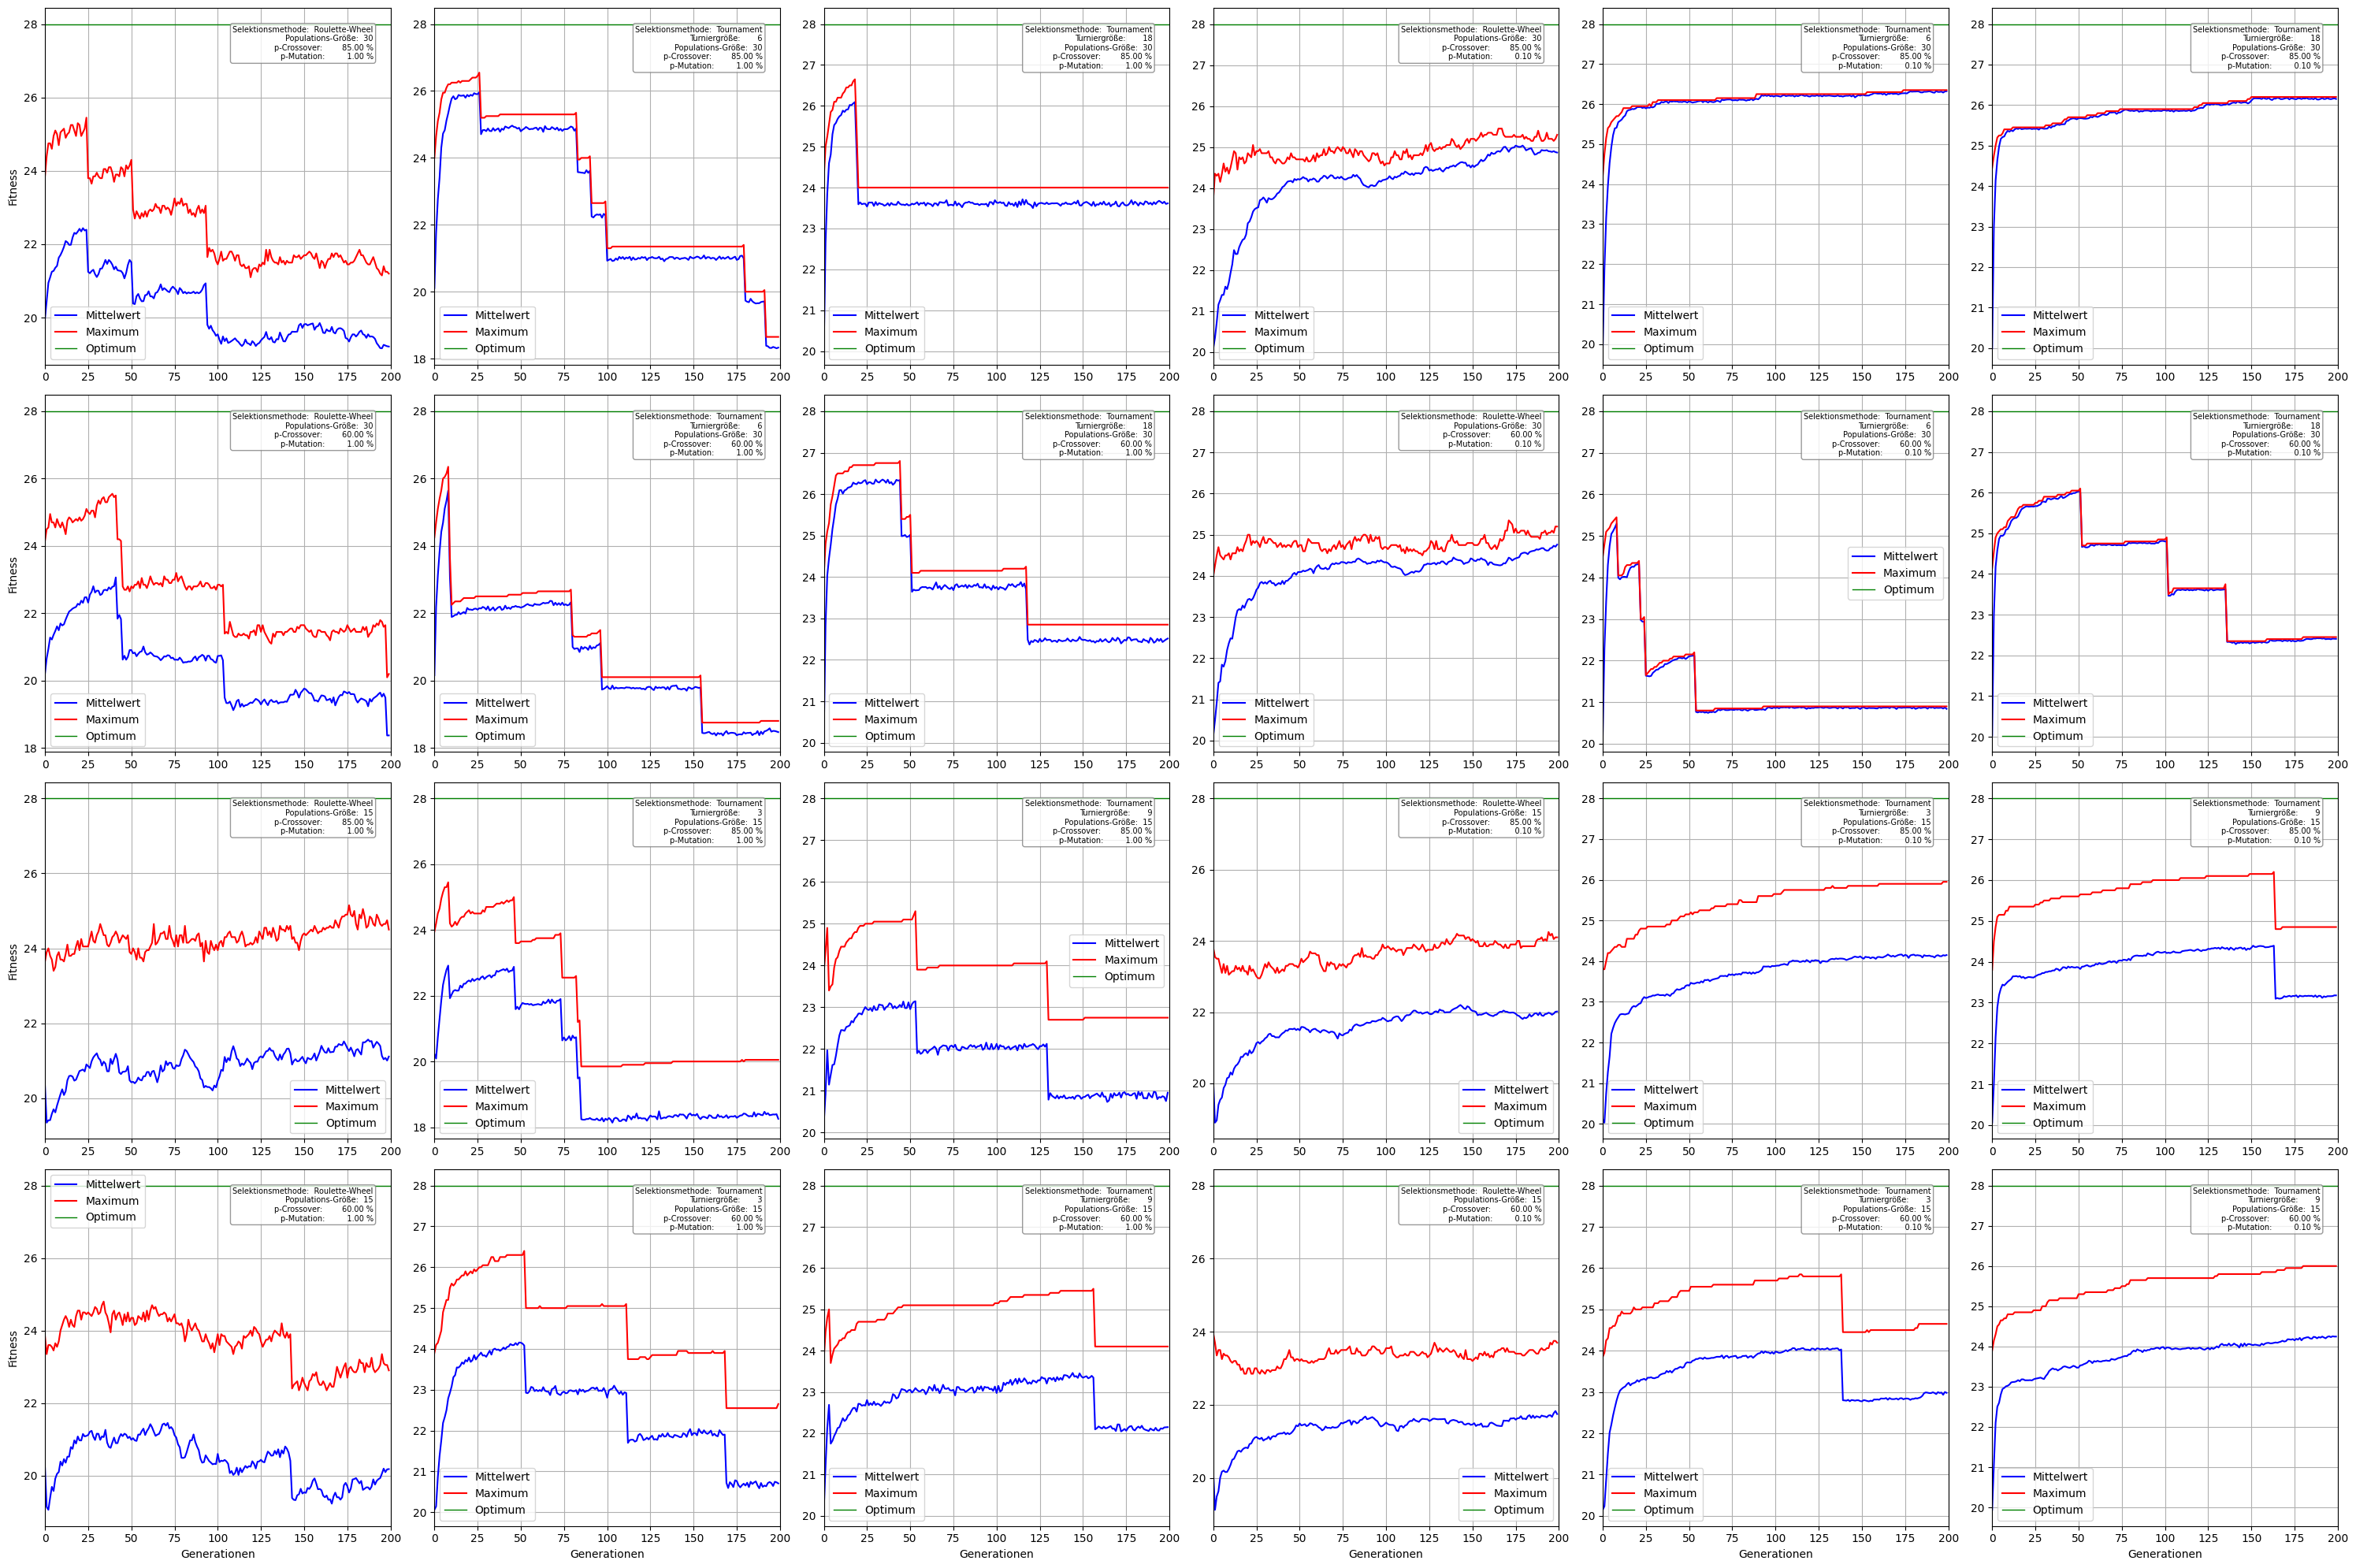

Optimum: [1, 3, 5, 7, 2, 0, 6, 4]
Fitness: 28


In [23]:
import numpy as np
import matplotlib.pyplot as plt



def decode_8_queens(g):
  # x_i = [4,2,1] * [g_i2, g_i2, g_i2]
  g_np = np.array(g)
  x_np = np.dot(g_np.reshape(-1,3), [4,2,1])
  x = [ int(x_i) for x_i in x_np ]

  return list(x)


def fitness_8_queens(g):
  # Binärvektor 'g' als ganzahligen Vektor 'x' dekodieren
  x = decode_8_queens(g)

  # n_h = Horizontal angreifende Damenpaare
  cols, counts = np.unique(x, return_counts=True)
  n_h = np.sum(counts * (counts - 1) // 2)

  # n_v1 = Vertikal angreifende Damenpaare (aufsteigend)
  _, count = np.unique(np.arange(len(x)) - x, return_counts=True)
  n_v1 = np.sum(count * (count - 1) // 2)

  # n_v1 = Vertikal angreifende Damenpaare (absteigend)
  _, count = np.unique(np.arange(len(x)) + x, return_counts=True)
  n_v2 = np.sum(count * (count - 1) // 2)

  # Fitness = n_h + n_v1 + n_v2
  return 28 - (n_h + n_v1 + n_v2)


# GA mit verschiedenen Einstellungen testen
ga_experiment(m=24, fitness=fitness_8_queens, optimum=28, max_gen=200, decode=decode_8_queens)


---
## **2.2 - Flächen-Färbeproblem**

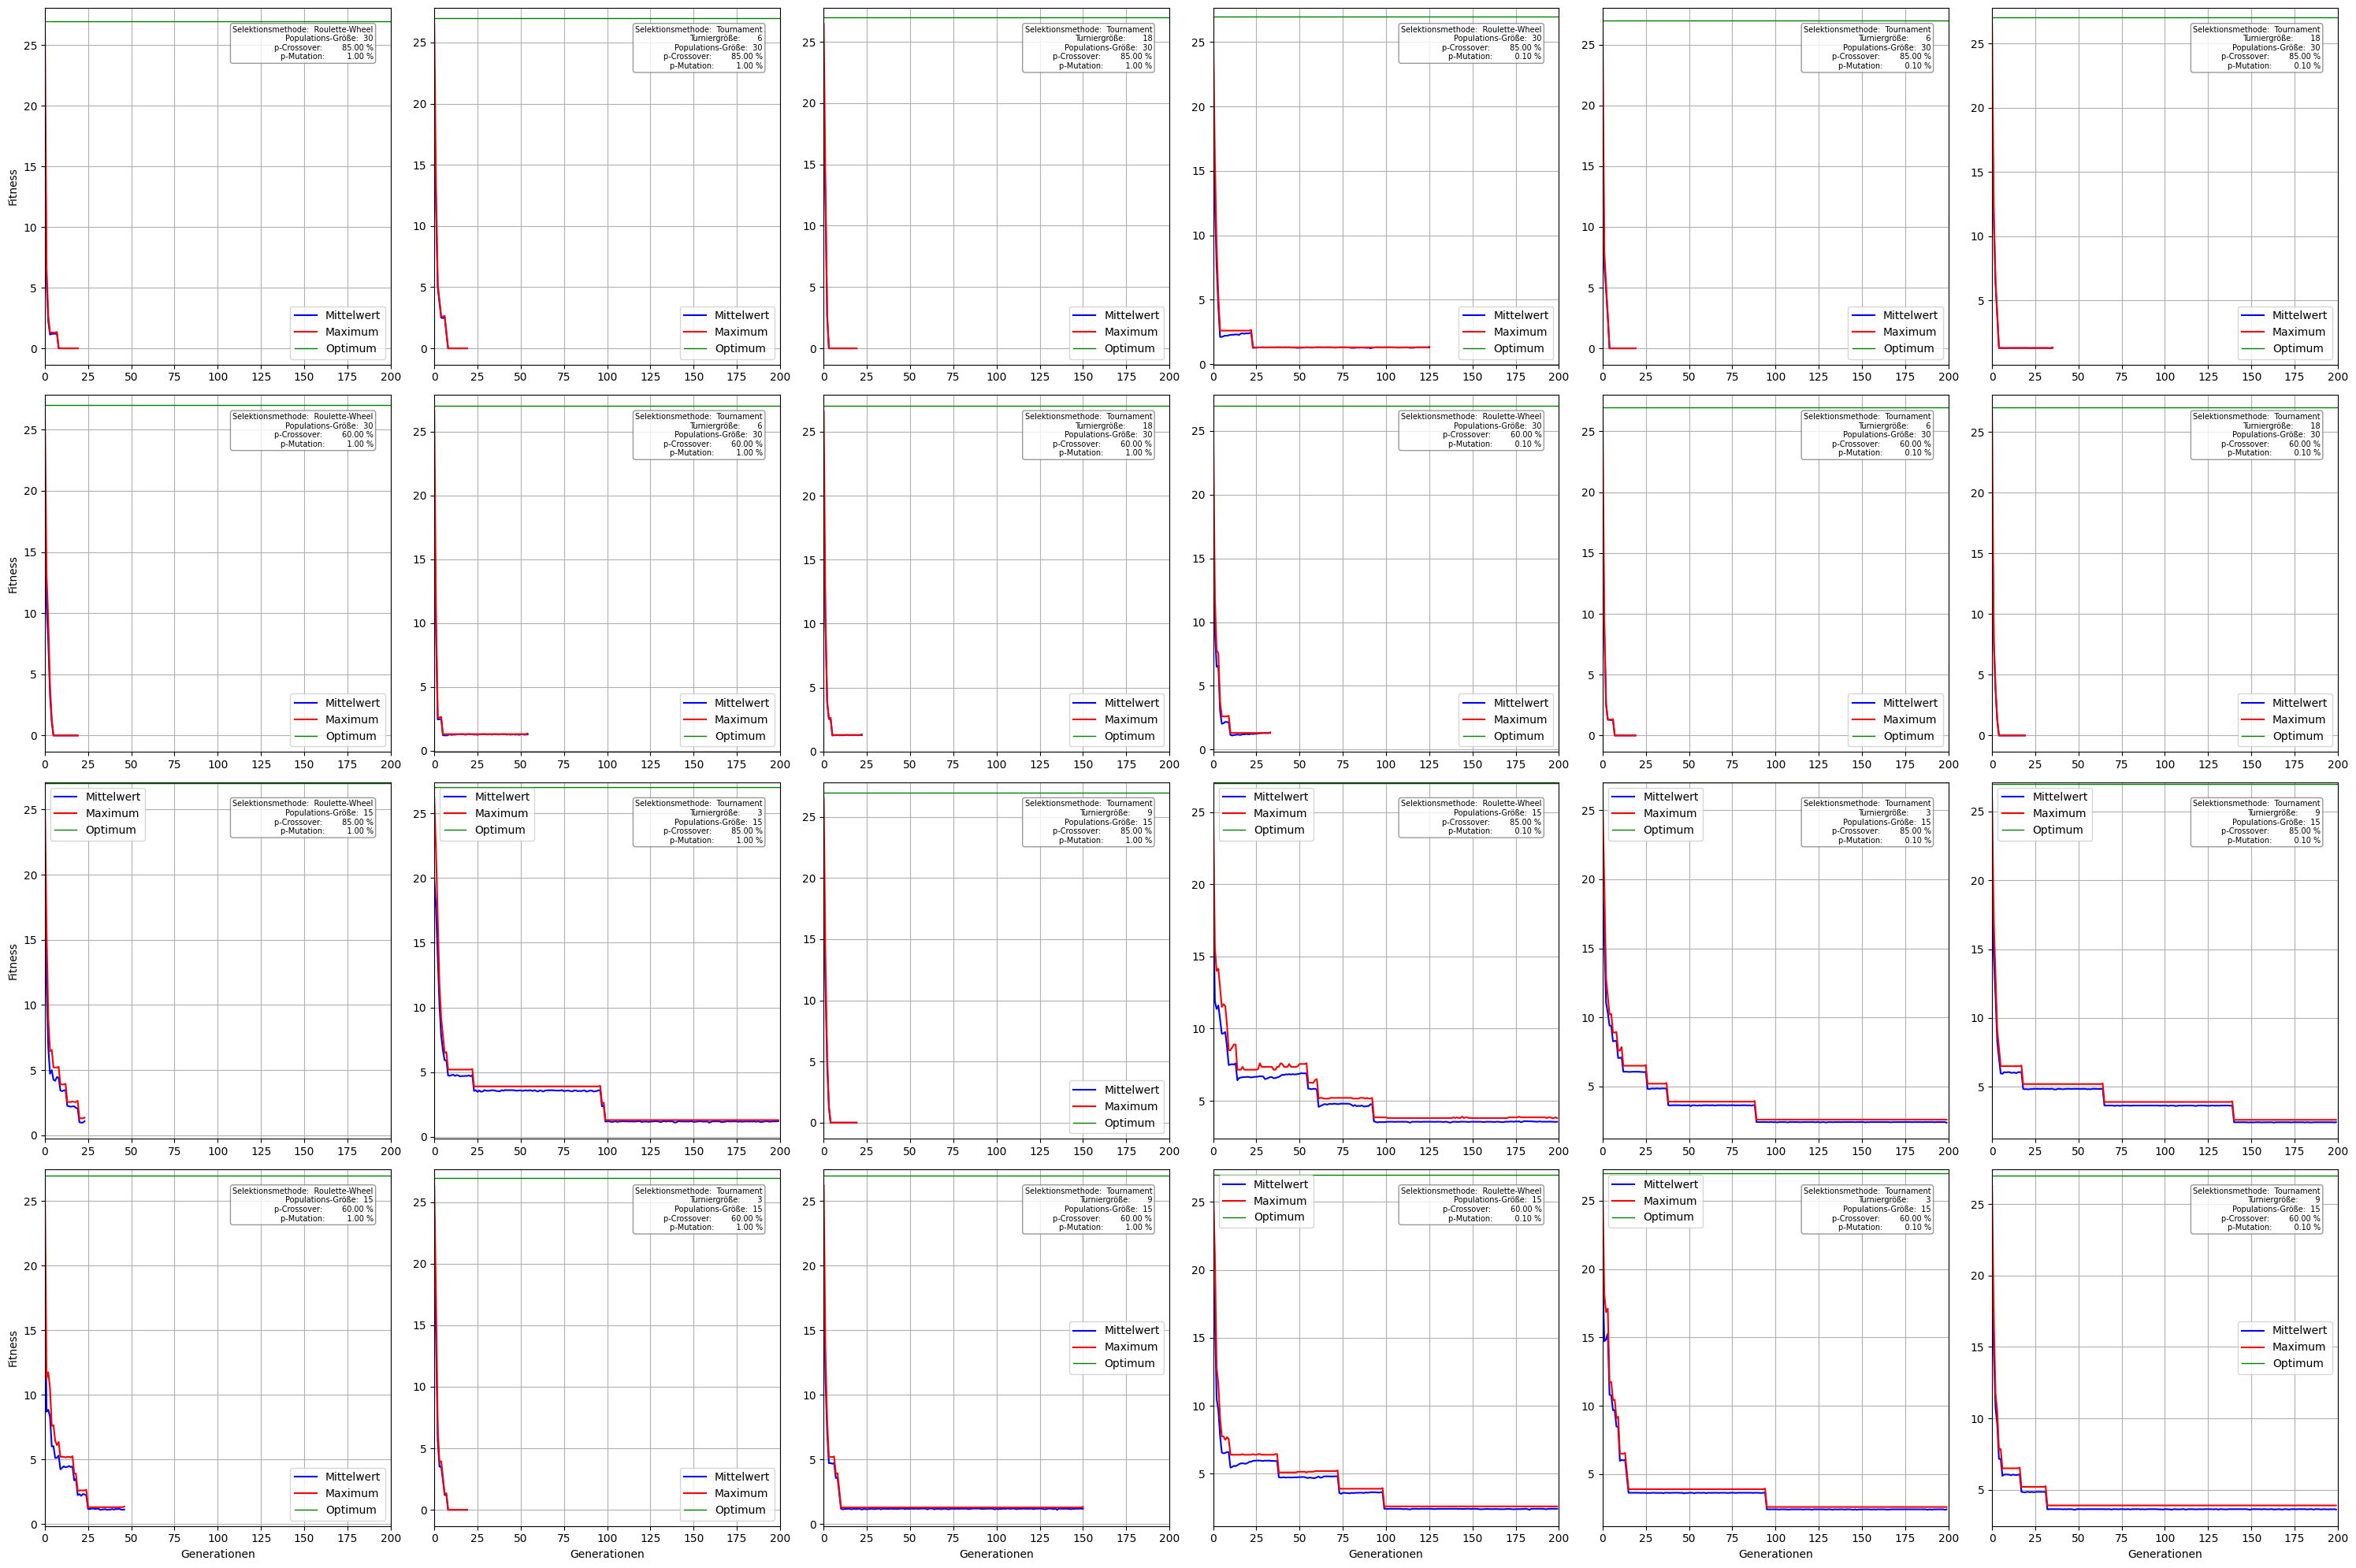

Optimum: [2, 0, 1, 2, 0, 0]
Fitness: 27


In [24]:
import numpy as np



def decode_land_farbe(g):
  # x_i = [4,2,1] * [g_i2, g_i2, g_i2]
  g_np = np.array(g)
  x_np = np.dot(g_np.reshape(-1,3), [4,2,1])
  x = [ (int(x_i) % 5) for x_i in x_np ]

  return list(x)


# Adjazentenliste der Nachbarländer
# A = 0, B = 1, C = 2, D = 3, E = 4, F = 5
L = [ [1, 2], [0, 2, 3], [0, 1, 3], [1, 2, 4], [3], [] ]


def fitness_land_farbe(g):
  # Binärvektor 'g' als ganzahligen Vektor 'x' dekodieren
  x = decode_land_farbe(g)

  # n = Anzahl verwendter Farben
  colors = np.unique(x)
  n = len(colors)

  # z = Anzahl Verletzungen der Nebenbedingung
  z=0

  for i, neighbors in enumerate(L):
    for j in neighbors:
      if (x[i] == x[j]):
        z += 1

  z //= 2

  # Fitness = 25 + (5 - n) - (5 * z)
  return 25 + (5 - n) - (5 * z)


# GA mit verschiedenen Einstellungen testen
ga_experiment(m=18, fitness=fitness_land_farbe, optimum=27, max_gen=200, decode=decode_land_farbe)


---
# **[3 - Anwendungen](https://github.com/Artificial-Intelligence-HSBI-TDU/KI-Vorlesung-W25/blob/master/homework/sheet-ea.md\#ea02-implementierung-5p)**
---

1.  Analysieren Sie die Implementierung von [Randal Olson “Here’s Waldo:
    Computing the optimal search strategy for finding
    Waldo”](http://www.randalolson.com/2015/02/03/heres-waldo-computing-the-optimal-search-strategy-for-finding-waldo/)
    ([Direktlink](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects)).
2.  Schauen Sie sich nun den [“Evolution
    Simulator”](https://www.openprocessing.org/sketch/205807) an. Wie
    ist dort die Modellierung erfolgt (Kodierung, Operatoren,
    Fitnessfunktion)?
3.  Wie werden EA/GA konkret im [“american fuzzy
    lop”](https://lcamtuf.coredump.cx/afl/) eingesetzt?

Welche Fitnessfunktion wurden in den drei Beispielen jeweils genutzt,
wie die Individuen und die Operatoren codiert?

Recherchieren Sie, in welchen *anderen* Anwendungen Evolutionäre
Algorithmen eingesetzt werden. Erklären Sie kurz, wie und wofür die
EA/GA jeweils genutzt werden.

*Thema*: Analyse von GA-Implementierungen


---
## **3.1 - Here´s Waldo**

Die Individuum sind hier nicht Binär-kodiert, sondern enthalten die Koodianten direkt als Reelle Werte. Ein Segment des Vektors macht jeweils ein Wegpunkt (bzw. dessen Koodianten) aus.

In diesem Fall wird die Fitnessfunktion minimiert, nicht maximiert. Hier stellt diese die gesamte Distanz über die Wegpunkte des Indiviums dar, es wird einfach die Euklidische Distanz berechnet.

Zur Selektion werden einfach die fittesten 10% ausgewählt. Mit diesen werden jeweils folgende Nachkommen erstellt:

* 1x direkte Kopie
* 4x Kopie mit je 1-3 Punkt-Mutationen (dh. es werden 2 Wegpunkte eines Individuum bzw. Pfads vertauscht)
* 5x Kopie mit je 1 Shuffle-Mutationen (dh. es wird ein Teilpfad innerhalb des Individuums bzw. Pfads verschoben)

Es findet also keine sexuelle Reproduktion mit Crossover statt, sondern lediglich Mutationen an Kopien der selektierten Individuen.

---

Die Implementierung scheint für ein solches (geometrisches) Pfad-Optimierungsproblem sehr sinnvoll zu sein, jedoch könnte man vlt auch von Crossover profitieren.

---
## **3.2 - Evolution Simulator**

Als Individuen werden Objekte von *Creature* erstellt.

Deren Parameter *d* gibt die von der *Creature* erreichte Distanz zur Mitte an, dieser Wert wird hier als Fitnessfunktion maximiert.

Zur Selektion werden einfach die fittesten 50% ausgewählt, diese werden durch die Funktionen *modfiyNode()*, *modfiyMuscle()* mutiert.

Auch hier findet also kein klassiches Crossover statt, sondern lediglich Mutationen an Kopien der selektierten Individuen.

---
## **3.3 - American Fuzzy Lop**

Die Individuen beim *American Fuzzy Lop* stellen Eingaben für das zu testende Programms dar.

Im Sinne der wird Fitnessfunktion eine möglichst große Code-Abdeckung angestrebt. Eingaben / Individuen, die neue bzw. mehr Pfade ausführen, haben also größere Fitness.

Die Selektion wählt nur Eingaben / Individuen aus, die neue Pfade abdecken konnten, entsprechend also die Maximal-Fitness steigern konnten.

Unter den verschiedenen Eingaben (bzw. Individuen) der Auswahl wird mittels Crossover die nächste Generation erstellt. Als Mutation werden Bits (Bitflip-Mutation) oder ganze Blöcke der Eingabe verändert.

---

Besonders im Gegensatz zu anderen EAs / GAs ist die Selektion, die zwar fitnessbasiert ist, jedoch nur nach reinem Fitnesszuwachs / neuer Pfad-Abdeckung schaut.

Für diese Anwendung ist der Fokus auf besonders viel Exploration sicherlich sehr sinnvoll.

---
## **3.4 - Anwendungen von EA**

**Portfolio-Management:**

EA / GA wird in der Portfolio-Optimierung eingesetzt, um die Anteile bzw. verhältnisse von Assets (Aktien, Anleihen, etc.) zu optimieren, wobei die Asset-Auswahl des Portfolios meist fix ist, nur die verhältnisse sind variabel. Ein Portfolio wird dann als Individuum mit den einzelnen Anteilen kodiert. Die Fitnessfunktion bewertet die typischen Kennzahlen wie Rendite, Performance, Risiko (zb. als Volatilität, in Prozent), Risiko-Chancen-Verhältnis (zB. Sharpe Ratio). Durch **Selektion, Rekombination (mit Crossover) und Mutation** entstehen neue Generationen von Portfolios. Die Kennzahlen des Portfolios verbessern sich entsprechend, bis eine optimale Lösung gefunden ist.